In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
dataset_path = "/content/drive/MyDrive/5Animals"

img_dt_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.1,
    rotation_range=10,

)

dataset_train = img_dt_generator.flow_from_directory(
    dataset_path,
    subset="training",
    shuffle=True,
    target_size=(224,224),
    save_to_dir="/content/drive/MyDrive/Animals_test"
)

dataset_validation = img_dt_generator.flow_from_directory(
    dataset_path,
    subset="validation",
    target_size=(224,224),
    shuffle=False,
)


Found 1052 images belonging to 5 classes.
Found 262 images belonging to 5 classes.


In [12]:
model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(5, activation='softmax')
    ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [13]:
history = model.fit(dataset_train,epochs=20,validation_data=dataset_validation)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.2104 - loss: 1.6772 - val_accuracy: 0.4198 - val_loss: 1.3549
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.3963 - loss: 1.4052 - val_accuracy: 0.4771 - val_loss: 1.2320
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.4103 - loss: 1.3277 - val_accuracy: 0.4809 - val_loss: 1.2033
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5192 - loss: 1.2067 - val_accuracy: 0.4885 - val_loss: 1.1951
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.4972 - loss: 1.2043 - val_accuracy: 0.5649 - val_loss: 1.1327
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5807 - loss: 1.1100 - val_accuracy: 0.5382 - val_loss: 1.1630
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5756 - loss: 0.9885 - val_accuracy: 0.5687 - val_loss: 1.0576
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6601 - loss: 0.8983 - val_accuracy: 0.5687 - val_loss:

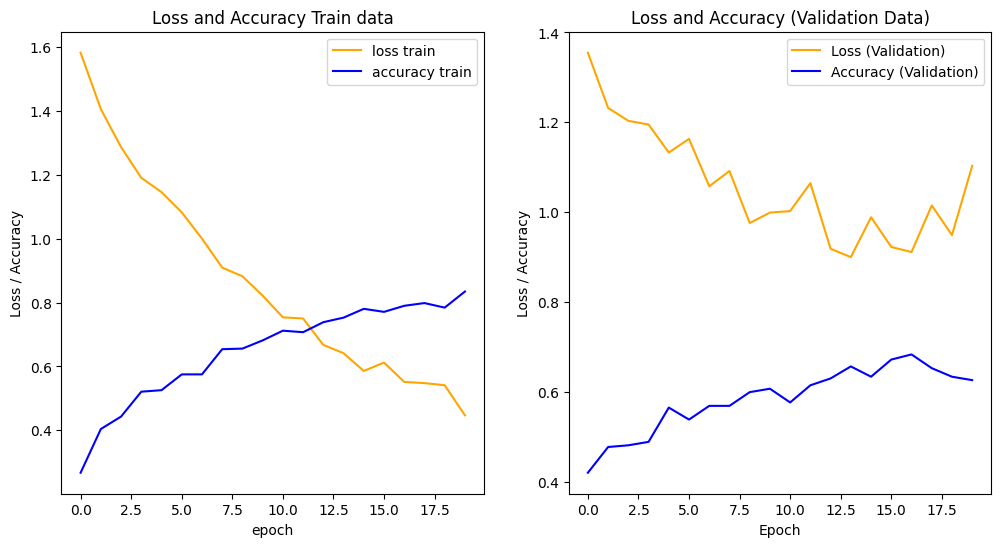

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="loss train",color="orange")
plt.plot(history.history["accuracy"],label="accuracy train",color="blue")
plt.title("Loss and Accuracy Train data")
plt.xlabel("epoch")
plt.ylabel("Loss / Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"], label="Loss (Validation)", color="orange")
plt.plot(history.history["val_accuracy"], label="Accuracy (Validation)", color="blue")
plt.title("Loss and Accuracy (Validation Data)")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend()

plt.show()

In [15]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │       5,537,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,784,657 (64.03 MB)

 Trainable params: 5,594,885 (21.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,189,772 (42.69 MB)

In [23]:
y_true = dataset_validation.classes
y_pred = model.predict(dataset_validation)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 540ms/step
[[29 19  0  3  7]
 [16 33  6  3  5]
 [ 3  5 30  1  3]
 [10  9  2 21  3]
 [ 1  2  3  0 48]]


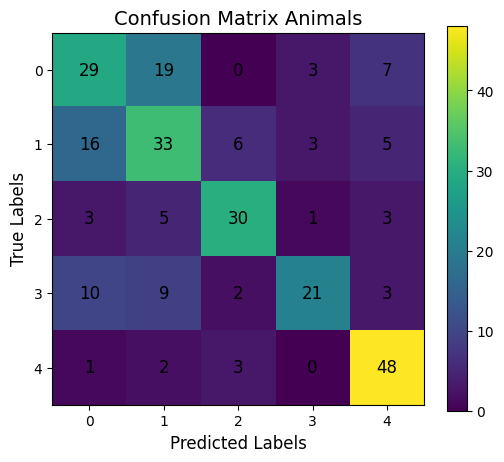

In [26]:
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest')
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=12)

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix Animals", fontsize=14)
plt.xticks(np.arange(cm.shape[1]))
plt.yticks(np.arange(cm.shape[0]))
plt.show()

In [27]:
image_test_1 = cv2.imread("dog_1.jpg",1)
image_test_1 = cv2.resize(image_test_1,(224,224))
image_test_1 = image_test_1 / 255.0

test_1 = model.predict(np.array([image_test_1]))
p = np.argmax(test_1)
print(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4
